# 🌳 Decision Tree & Random Forest Explained with Real-World Project

This notebook explains how to use Decision Tree and Random Forest classifiers on a real-world **loan prediction dataset** using Python. We'll go step by step with proper explanation, visualization, preprocessing, model training, and evaluation.

---

## 🔹 Part 1: Import Libraries

Before starting, we need to import all the necessary Python libraries.

- `pandas` for data manipulation.
- `numpy` for numerical operations.
- `matplotlib` and `seaborn` for data visualization.
- Scikit-learn (`sklearn`) for building ML models.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# 🩺 Disease Prediction using Symptoms – ML Project Overview

## 📊 Dataset Description

The dataset used in this project contains information about various **diseases and their associated symptoms**. Each row in the dataset represents a disease along with binary indicators (1 or 0) for different symptoms. Some key characteristics of the dataset:

- **Rows:** Each row represents a case with multiple symptoms and a disease label.
- **Columns:**
  - `diseases`: The target variable containing the name of the disease.
  - `symptom_1`, `symptom_2`, ..., `symptom_n`: These columns indicate whether a particular symptom is present (1) or not (0).
- In some datasets, symptom columns may be binary, while others may use frequency or severity scores.

This dataset is ideal for **multi-class classification**, where we predict the disease based on symptoms.

---

## 🧠 Project Objective

The goal of this project is to:

1. **Analyze and clean the dataset**:
   - Handle missing values.
   - Understand symptom distributions.
   - Encode categorical labels.

2. **Visualize the data**:
   - Show frequency of top diseases.
   - Highlight correlations between symptoms and diseases using plots.

3. **Feature Selection**:
   - Use correlation or symptom frequency to select the most relevant symptoms for prediction.

4. **Model Training and Evaluation**:
   - Apply machine learning classifiers such as:
     - Decision Tree
     - Random Forest
   - Evaluate the model using metrics such as:
     - Accuracy
     - Precision
     - Recall
     - F1-Score

5. **Improve and Tune Models**:
   - Try filtering rare diseases (with fewer samples).
   - Use hyperparameter tuning (like GridSearchCV) to improve model performance.

---

## 💡 Real-World Relevance

This type of system can be used in healthcare for **preliminary diagnosis** based on symptoms before consulting a doctor. It can help in:

- Reducing early diagnostic delay
- Educating patients about potential illnesses
- Supporting healthcare staff in decision-making

---

## ✅ Technologies Used

- **Pandas** & **NumPy** for data handling
- **Matplotlib** & **Seaborn** for visualization
- **Scikit-learn** for modeling and evaluation


In [2]:

loans = pd.read_csv("loan_data.csv")
loans.info()
loans.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## 📈 FICO Score Distribution by Credit Policy

The following histogram visualizes the distribution of **FICO scores** based on the `credit.policy` feature:

- `credit.policy = 1` (Blue): The applicant **meets** the lending institution's credit policy.
- `credit.policy = 0` (Red): The applicant **does not meet** the credit policy.

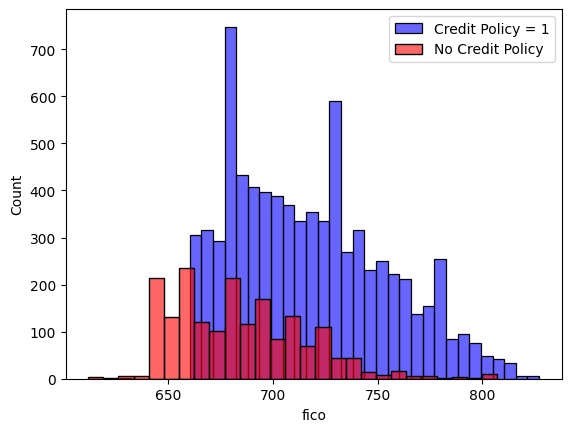

In [3]:
sns.histplot(loans[loans['credit.policy']==1]['fico'], color='blue', label='Credit Policy = 1', alpha=0.6)
sns.histplot(loans[loans['credit.policy']==0]['fico'], color='red', label='No Credit Policy', alpha=0.6)
plt.legend()
plt.show()

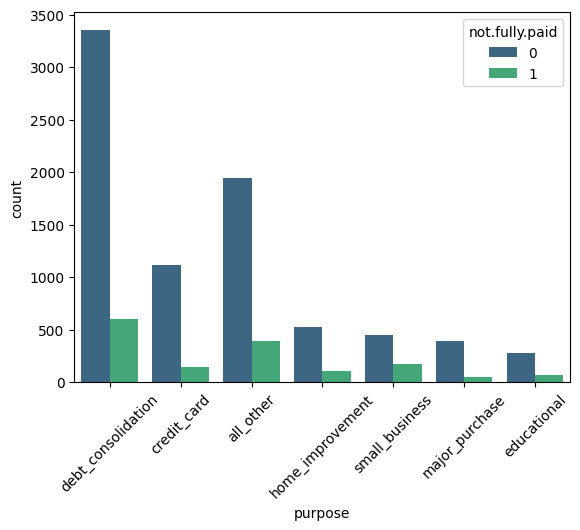

In [4]:
sns.countplot(x='purpose', hue='not.fully.paid', data=loans, palette='viridis')
plt.xticks(rotation=45)
plt.show()

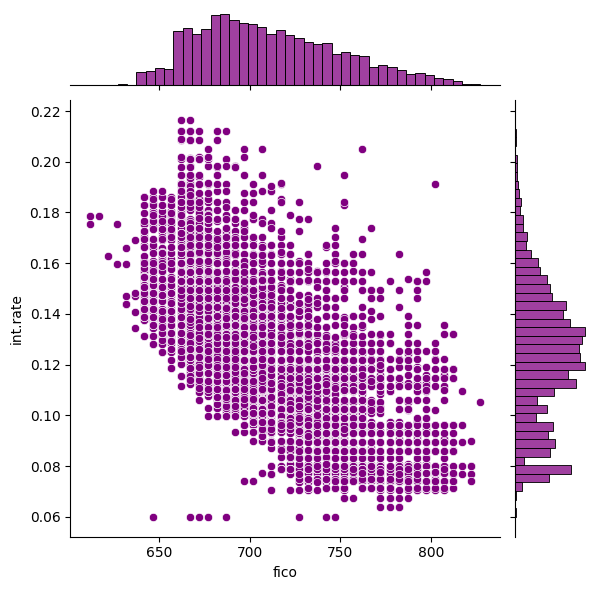

In [5]:
sns.jointplot(x='fico', y='int.rate', data=loans, color='purple')
plt.show()

In [6]:
cat_feats = ['purpose']
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)


## 🧪 Preparing the Data for Training

Before building any machine learning model, we need to **separate the features (X)** from the **target variable (y)**, and then **split** the dataset into training and testing sets.

```python

X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)


In [7]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)


## 🌳 What is a Decision Tree?

A **Decision Tree** is a supervised machine learning algorithm that is used for both **classification** and **regression** tasks. It works like a flowchart where:

- Each **internal node** represents a decision on a feature (e.g., FICO score > 700?).
- Each **leaf node** represents the outcome or class label (e.g., loan paid or not).
- Paths from root to leaf represent **decision rules**.

The tree splits the data into smaller groups based on feature values to make predictions.

---

## 🤔 Why Use a Decision Tree Here?

In this project, we're analyzing loan data to **predict whether a person will fully pay back their loan or not** (`not.fully.paid` column).

We use a **Decision Tree** because:

- It is **easy to interpret** and visualize.
- It **automatically selects important features**.
- It can handle both **numerical and categorical** data.
- It works well even when the data is not perfectly linear or has non-linear relationships.

---

## 🎯 Purpose of Decision Tree in This Project

The goal of this project is to **predict loan repayment behavior** based on features like:

- FICO score
- Credit policy
- Purpose of loan
- Interest rate
- Debt-to-income ratio, etc.

The **Decision Tree** helps us:

- Understand which features contribute most to loan default.
- Predict if a customer is **likely to default** on a loan.
- Assist in **risk assessment** and smarter lending decisions.

This is valuable in financial institutions to reduce loan losses and improve decision-making.


In [8]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

pred_dt = dtree.predict(X_test)

print("Decision Tree Report:")
print(classification_report(y_test, pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_dt))


Decision Tree Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.24      0.21       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874

Confusion Matrix:
[[2001  430]
 [ 338  105]]


## 🌲 What is a Random Forest?

**Random Forest** is an ensemble machine learning algorithm that builds **multiple Decision Trees** and merges their outputs to get a more accurate and stable prediction.

Key points:
- It creates a "forest" of Decision Trees using **random subsets** of the data.
- Each tree gives a prediction, and the forest takes the **majority vote** (for classification) or average (for regression).
- It reduces **overfitting** and improves **generalization** compared to a single Decision Tree.

---

## 🤔 Why Use Random Forest in This Project?

While a single Decision Tree can perform well, it can also be **very sensitive** to noise in the data and prone to **overfitting**.

We use **Random Forest** here because:

- It is **more accurate** and **robust** than a single tree.
- It can handle **imbalanced or complex data** better.
- It gives us **feature importance**, helping identify which features are most influential in predicting loan default.
- It reduces **variance** in the model while maintaining low bias.

---

## 🎯 Purpose of Random Forest in This Loan Prediction Project

The task is to **predict whether a person will repay their loan fully or not** (`not.fully.paid` = 0 or 1), based on features like:

- FICO score
- Purpose of loan
- Credit policy
- Debt-to-income ratio
- Installment, etc.

Using Random Forest helps:

- Build a **reliable** and **powerful model** that works well on unseen data.
- Predict with **higher accuracy** if a borrower is at risk of default.
- Support financial institutions in making **safe lending decisions**.
- Understand which features have the **most impact** on default risk through feature importance plots.

Random Forest is a great choice for **real-world applications** like credit scoring, fraud detection, and risk analysis.


In [10]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

pred_rfc = rfc.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, pred_rfc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_rfc))


Random Forest Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.59      0.03      0.06       443

    accuracy                           0.85      2874
   macro avg       0.72      0.51      0.49      2874
weighted avg       0.81      0.85      0.78      2874

Confusion Matrix:
[[2422    9]
 [ 430   13]]


## 📊 Model Evaluation: Decision Tree vs Random Forest

After training both the **Decision Tree** and **Random Forest** classifiers, we evaluated their performance using classification reports and confusion matrices.

---

### 🌳 Decision Tree Classifier

#### 📋 Classification Report:

| Metric     | Class 0 (Fully Paid) | Class 1 (Not Fully Paid) |
|------------|----------------------|---------------------------|
| Precision  | 0.86                 | 0.20                      |
| Recall     | 0.82                 | 0.24                      |
| F1-Score   | 0.84                 | 0.21                      |
| Accuracy   | **0.73** overall     |                           |

#### 🔍 Confusion Matrix:
Actual 0 2001 430
Actual 1 338 105


- **Interpretation**:
  - The model is biased towards predicting class **0** (fully paid).
  - It **misclassifies many defaults (class 1)** as class 0.
  - Recall for class 1 is **very low (24%)**, meaning it misses most actual defaulters.

---

### 🌲 Random Forest Classifier

#### 📋 Classification Report:

| Metric     | Class 0 (Fully Paid) | Class 1 (Not Fully Paid) |
|------------|----------------------|---------------------------|
| Precision  | 0.85                 | 0.59                      |
| Recall     | 1.00                 | 0.03                      |
| F1-Score   | 0.92                 | 0.06                      |
| Accuracy   | **0.85** overall     |                           |

#### 🔍 Confusion Matrix:
          Predicted 0   Predicted 1
Actual 0 2422 9
Actual 1 430 13

                                                        
- **Interpretation**:
  - Random Forest is **highly skewed** toward class 0.
  - It predicts almost everyone as **not a defaulter**, which explains the **high accuracy (85%)**, but at the cost of **almost ignoring class 1**.
  - Only **13 actual defaulters** were correctly identified.
  - Recall for class 1 is **just 3%**, meaning the model fails to catch risky borrowers.

---

### ⚖️ Comparison Summary

| Metric           | Decision Tree | Random Forest |
|------------------|---------------|----------------|
| Accuracy         | 73%           | **85%**         |
| Precision (1)    | 20%           | **59%**         |
| Recall (1)       | **24%**       | 3%             |
| F1-Score (1)     | **21%**       | 6%             |

- **Random Forest** gives better overall accuracy but **fails to detect defaulters**.
- **Decision Tree** performs slightly better in identifying defaulters (class 1) but still poor overall.

---

### ✅ Conclusion

While Random Forest has a higher accuracy, it **severely underperforms in identifying risky loans (class 1)**. This is dangerous in real-world loan approval settings because:

- Missing defaulters could lead to **financial loss** for lenders.
- A model that **balances precision and recall** for class 1 is preferable.



